___

<center><h1>Clustering Model - Youtube</h1></center>

___

<center><h2>Pragma</h2></center><br>
<center> Assessment Consultor Cientifico de Datos </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presentado por:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>

<center>Mayo 2025</center>
<p></p>

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('../data/cleaned_youtube_data.csv')

In [39]:
print(df.columns.tolist())

['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'category_name', 'publish_date', 'publish_hour', 'publish_day', 'days_until_trending', 'engagement_rate', 'like_ratio', 'positive_engagement_rate', 'weighted_engagement_score', 'is_weekend', 'is_morning', 'is_afternoon', 'is_evening', 'is_night', 'kmeans_cluster', 'dbscan_cluster']


In [21]:
# Select features for clustering
features = [
    'views',
    'weighted_engagement_score',
    'like_ratio',
    'days_until_trending',
    'is_morning',
    'is_afternoon',
    'is_evening',
    'is_night'
]

# Extract features
X = df[features]

In [22]:
# Feature Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [23]:
# K-means Clustering

inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_normalized, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method For Optimal k')

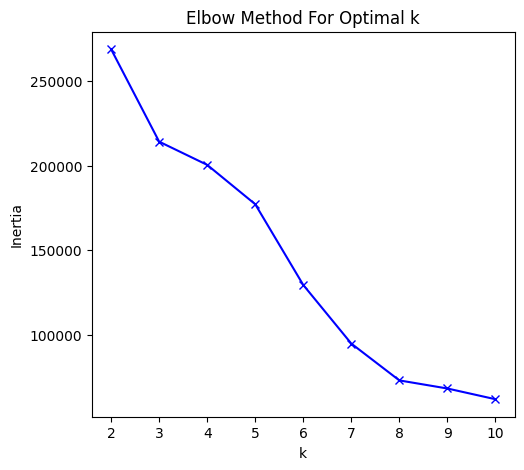

In [24]:
# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

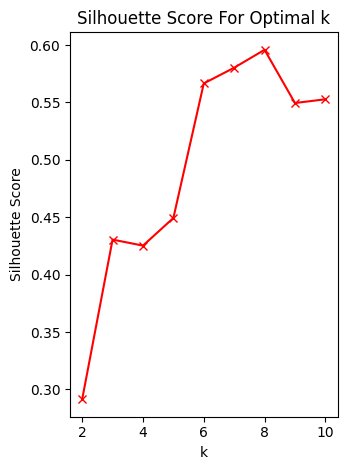

In [25]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.tight_layout()


In [26]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

In [29]:
# Perform K-means with optimal k 
optimal_k = 6  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_normalized)

In [27]:
# Perform DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=6)
dbscan_labels = dbscan.fit_predict(X_normalized)

In [32]:
# Add cluster labels to the original dataframe
df['kmeans_cluster'] = kmeans_labels
df['dbscan_cluster'] = dbscan_labels

In [33]:
# Analyze cluster characteristics
print("\nK-means Clustering Results:")
print(df.groupby('kmeans_cluster')[features].mean())

print("\nDBSCAN Clustering Results:")
print(df.groupby('dbscan_cluster')[features].mean())


K-means Clustering Results:
                       views  weighted_engagement_score  like_ratio  \
kmeans_cluster                                                        
0               1.621366e+06                  14.292875    0.985755   
1               2.386738e+06                   3.753420    0.949481   
2               1.830976e+06                   3.919963    0.947610   
3               2.759512e+06                   3.871251    0.945995   
4               1.063720e+06                   1.461540    0.507797   
5               3.449270e+06                   3.369604    0.942943   

                days_until_trending  is_morning  is_afternoon  is_evening  \
kmeans_cluster                                                              
0                          3.849892    0.037797      0.205184    0.558315   
1                         11.847447    0.000000      1.000000    0.000000   
2                         15.006379    0.000000      0.000000    1.000000   
3                

In [34]:
pca_df['kmeans_cluster'] = kmeans_labels
pca_df['dbscan_cluster'] = dbscan_labels

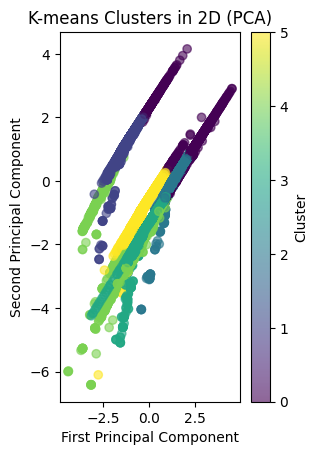

In [35]:
# K-means clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['kmeans_cluster'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.title('K-means Clusters in 2D (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')

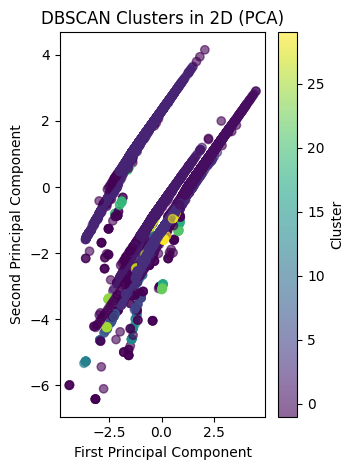

In [37]:
# DBSCAN clusters 
plt.subplot(1, 2, 2)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['dbscan_cluster'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.title('DBSCAN Clusters in 2D (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()


Text(0.5, 1.0, 'DBSCAN Cluster Distribution')

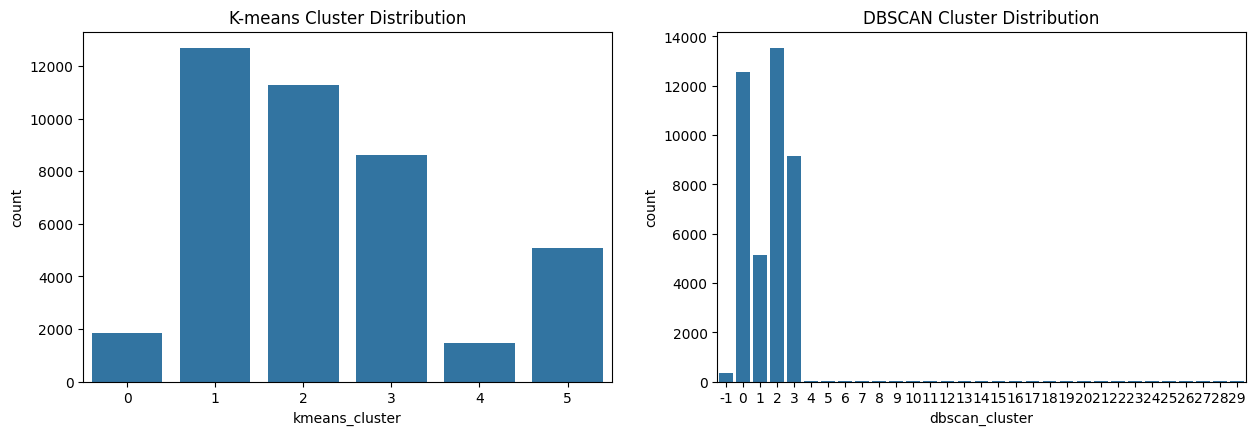

In [38]:
# Create visualizations for cluster distributions
plt.figure(figsize=(15, 10))

# K-means cluster distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='kmeans_cluster')
plt.title('K-means Cluster Distribution')

# DBSCAN cluster distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='dbscan_cluster')
plt.title('DBSCAN Cluster Distribution')